### Построение прогноза цен на акции с использованием LSTM

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real price')
    plt.plot(predicted, color='blue',label='Predicted price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

https://yadi.sk/d/iVm727r5Txx8vQ

In [3]:
dataset = pd.read_csv('.\\9.IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

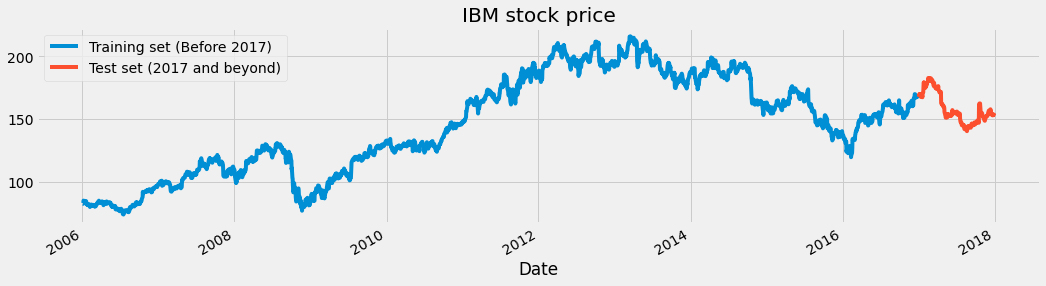

In [5]:
# Цена задается атрибутом 'High'
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Для каждого элемента обучающей выборки сохраняем 60 предшествующих элементов
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [9]:
X_train.shape

(2709, 60, 1)

In [10]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(LSTM(units=50))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0185
Epoch 2/50
2709/2709 [==============================] - 12s 5ms/step - loss: 0.0069
Epoch 3/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0046
Epoch 4/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0034
Epoch 5/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0032
Epoch 6/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0029
Epoch 7/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0024
Epoch 8/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0022
Epoch 9/50
2709/2709 [==============================] - 12s 5ms/step - loss: 0.0020
Epoch 10/50
2709/2709 [==============================] - 12s 5ms/step - loss: 0.0018
Epoch 11/50
2709/2709 [==============================] - 12s 5ms/step - loss: 0.0016
Epoch 12/50
2709/2709 [==============================] - 12s 5ms/step - lo

In [17]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [11]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

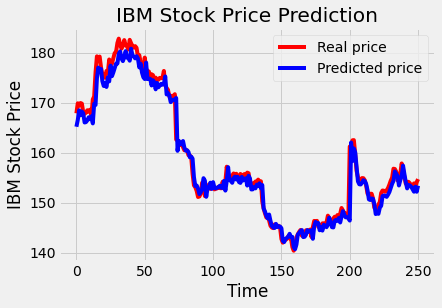

In [17]:
plot_predictions(test_set,predicted_stock_price)

### Построение прогноза с использованием GRU

In [20]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
2709/2709 [==============================] - 4s 2ms/step - loss: 0.1316
Epoch 2/50
2709/2709 [==============================] - 3s 1ms/step - loss: 0.0475
Epoch 3/50
2709/2709 [==============================] - 3s 1ms/step - loss: 0.0136
Epoch 4/50
2709/2709 [==============================] - 3s 1ms/step - loss: 0.0011
Epoch 5/50
2709/2709 [==============================] - 3s 1ms/step - loss: 8.1526e-04
Epoch 6/50
2709/2709 [==============================] - 3s 1ms/step - loss: 6.7594e-04
Epoch 7/50
2709/2709 [==============================] - 3s 1ms/step - loss: 6.6810e-04
Epoch 8/50
2709/2709 [==============================] - 3s 1ms/step - loss: 6.6609e-04
Epoch 9/50
2709/2709 [==============================] - 3s 1ms/step - loss: 6.6869e-04
Epoch 10/50
2709/2709 [==============================] - 4s 1ms/step - loss: 6.5695e-04
Epoch 11/50
2709/2709 [==============================] - 3s 1ms/step - loss: 6.5057e-04
Epoch 12/50
2709/2709 [==============================] - 

In [21]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

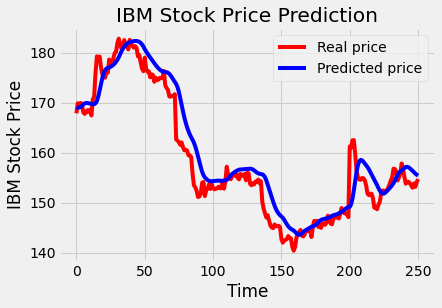

In [22]:
plot_predictions(test_set,GRU_predicted_stock_price)